In [211]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import statistics
from sklearn import preprocessing
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx

In [2]:
with open('data/songkick/data_songkick_concerts.csv', encoding='utf-8') as file_concerts:
    concerts_df = pd.read_csv(file_concerts, index_col=0)
    concerts_df.index.name = 'concert_id'
    
with open('data/songkick/data_songkick_venues.csv', encoding='utf-8') as file_venues:
    venues_df = pd.read_csv(file_venues, index_col=0)
    venues_df.index.name = 'venue_id'
    
with open('data/spotify/data_spotify_artists_light.csv', encoding='utf-8') as file_artists:
    artists_df = pd.read_csv(file_artists, index_col=0)
    artists_df.index.name = 'artist_id'

with open('data/spotify/data_spotify_top_genres_v3.csv', encoding='utf-8') as file_genres:
    genres_df = pd.read_csv(file_genres, index_col=0)

c:\users\cyrille\google drive\unil\ish\mémoire\thesis\env\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [56]:
concerts_df

,type,name,venue,locality,venue_id,startDate,endDate,artist_1,artist_url_1,artist_2,...,artist_64,artist_url_64,artist_65,artist_url_65,artist_66,artist_url_66,artist_67,artist_url_67,artist_68,artist_url_68
concert_id,,,,,,,,,,,,,,,,,,,,,
/festivals/3376423,festival,EDM Zinne w/Nehilo & Alex Napster 2021,"Sargans, Switzerland",Sargans,/venues/1943879,2021-08-14,2021-08-15,Flavio Stonex,/artists/10069604-flavio-stonex,Nehilo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/festivals/3370309,festival,P20 - EDM Night Zinne Sargans 2021,"Sargans, Switzerland",Sargans,/venues/1943879,2021-07-02,2021-07-03,Flavio Stonex,/artists/10069604-flavio-stonex,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/festivals/3338983,festival,EDM Night Vol.3 2020,"Sargans, Switzerland",Sargans,/venues/1943879,2020-10-23,2020-10-23,Flavio Stonex,/artists/10069604-flavio-stonex,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/festivals/3250141,festival,Privatevent (gebucht) 2020,VHS Flums,Sargans,/venues/2077709,2020-10-17,2020-10-17,Flavio Stonex,/artists/10069604-flavio-stonex,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/festivals/3326252,festival,PRESS N Play Daydance Sennwald 2020,"Sargans, Switzerland",Sargans,/venues/1943879,2020-06-20,2020-06-20,Flava & Stevenson,/artists/9379654-flava-and-stevenson,Flavio Stonex,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/concerts/14694789,concert,Demented Are Go,Komplex Klub,Zürich,/venues/2148724,2013-04-11,2013-04-11,Demented Are Go,/artists/325350-demented-are-go,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/concerts/14836239,concert,For the Fallen Dreams,Komplex Klub,Zürich,/venues/2148724,2013-04-09,2013-04-09,For the Fallen Dreams,/artists/1791519-for-the-fallen-dreams,Abandon All Ships,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/concerts/14836234,concert,Silverstein,Komplex Klub,Zürich,/venues/2148724,2013-04-07,2013-04-07,Silverstein,/artists/424864-silverstein,Funeral for a Friend,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
venues_df

,venue,locality,postal_code,street,country,latitude,longitude,venue_website
venue_id,,,,,,,,
/venues/1943879,"Sargans, Switzerland",Mels,8887,NaN,Switzerland,47.04380,9.42400,NaN
/venues/2958443,"Kiental, Switzerland",Frutigen,3723,NaN,Switzerland,46.54310,7.75573,http://naturalsound.ch
/venues/78549,"Wetzikon, Switzerland",Wetzikon,NaN,NaN,Switzerland,47.32706,8.80136,NaN
/venues/29550,Hallenstadion,Zürich,8050,Wallisellenstrasse 45,Switzerland,47.41161,8.55166,http://www.hallenstadion.ch/
/venues/32239,Hive,Zürich,8005,Geroldstrasse 5,Switzerland,47.38537,8.52047,http://www.hiveclub.ch/
...,...,...,...,...,...,...,...,...
/venues/2763668,House Show,Biel,NaN,NaN,Switzerland,47.14019,7.24377,NaN
/venues/4402932,YouTube Live,Geneva,NaN,NaN,Switzerland,NaN,NaN,NaN
/venues/3754699,Mcgees Irish Pub,Zürich,8003,Birmensdorferstrasse 83,Switzerland,47.37078,8.52391,NaN


In [3]:
artists_df

,artist_name,spotify_name,spotify_id,spotify_popularity,spotify_followers,spotify_listeners
artist_id,,,,,,
/artists/3684861-chk-chk-chk,!!! (Chk Chk Chk),!!!,1mmehjf7eHA10uHMisZGJg,46.0,133869.0,341800.0
/artists/694091-kadebostan,!!!Kadebostan!!!,Kadebostan,6hWRK8VkzbYP9p17M5APJR,10.0,1342.0,2000.0
/artists/5929284-brothers-in-bamako,"""Brothers In Bamako""",NaN,NaN,NaN,NaN,NaN
/artists/8704378-floyd-division-the-austrian-pink-floyd-tribute-band,"""Floyd Division"" The Austrian Pink Floyd Tribu...",NaN,NaN,NaN,NaN,NaN
/artists/7172094-jazzetcetera-stewy-von-wattenwyl-group-feat-lisette-spinnler,"""Jazz...etcetera"" Stewy von Wattenwyl Group, ...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
/artists/4301-and-you-will-know-us-by-the-trail-of-dead,…And You Will Know Us by the Trail of Dead,...And You Will Know Us by the Trail of Dead,6wBUn8gMP85n8dPu6LoUcF,39.0,63953.0,96600.0
/artists/1099500-euuroshima,€urOshima,Taro Urashima,5RSxs4Rb82wINvjv5KJ7JK,36.0,14555.0,90100.0
/artists/9573874-belize-it,≈ Belize ≈,≈ Belize ≈,3b8bBMsmGoBd8gYn1pngNc,15.0,6696.0,5100.0


In [62]:
artists_matched_df = artists_df.loc[pd.notna(artists_df['spotify_id'])]
spotify_popularity = artists_matched_df['spotify_popularity']
spotify_followers = artists_matched_df['spotify_followers']
spotify_listeners = artists_matched_df['spotify_listeners']
artists_matched_stats_df = artists_matched_df[['spotify_popularity', 'spotify_followers', 'spotify_listeners']]
artists_matched_stats_df

,spotify_popularity,spotify_followers,spotify_listeners
artist_id,,,
/artists/3684861-chk-chk-chk,46.0,133869.0,341800.0
/artists/694091-kadebostan,10.0,1342.0,2000.0
/artists/7433784-pyramids-jazz,26.0,1132.0,25100.0
/artists/8375378-agcrew,29.0,17632.0,28100.0
/artists/44425-smoove,0.0,1.0,28100.0
...,...,...,...
/artists/9915344-stas-mikhailov,2.0,52.0,226.0
/artists/4301-and-you-will-know-us-by-the-trail-of-dead,39.0,63953.0,96600.0
/artists/1099500-euuroshima,36.0,14555.0,90100.0


In [4]:
# artists stats

nbr_songkick_artists = len(artists_df)
nbr_spotify_artists = len(artists_matched_df)
nbr_songkick_artists_unmatched = nbr_songkick_artists - nbr_spotify_artists

unique_spotify_id = artists_df['spotify_id'].value_counts()
idx_list = list()
"""
for idx in list(unique_spotify_id[unique_spotify_id > 1].index):
    idx_list.extend(list(artists_df.loc[artists_df['spotify_id'] == idx].index))
"""
nbr_duplicate_matches = len(idx_list)

mean_popularity = round(spotify_popularity.mean(), 2)
median_popularity = statistics.median(spotify_popularity)
mean_followers = round(spotify_followers.mean(), 2)
median_followers = statistics.median(spotify_followers)
mean_listeners = round(spotify_listeners.mean(), 2)
median_listeners = statistics.median(spotify_listeners)

artists_stats = {
    'nbr_songkick_artists': nbr_songkick_artists,
    'nbr_spotify_artists': nbr_spotify_artists,
    'nbr_songkick_artists_unmatched': nbr_songkick_artists_unmatched,
    'nbr_duplicate_matches': nbr_duplicate_matches,
    'mean_popularity': mean_popularity,
    'median_popularity': median_popularity,
    'mean_followers': mean_followers,
    'median_followers': median_followers,
    'mean_listeners': mean_listeners,
    'median_listeners': median_listeners,
}
artists_stats

{'nbr_songkick_artists': 32231,
 'nbr_spotify_artists': 28537,
 'nbr_songkick_artists_unmatched': 3694,
 'nbr_duplicate_matches': 0,
 'mean_popularity': 22.91,
 'median_popularity': 19.0,
 'mean_followers': 181024.72,
 'median_followers': 2385.0,
 'mean_listeners': 484408.12,
 'median_listeners': 7000.0}

In [128]:
standardizer = preprocessing.StandardScaler()
minmax = preprocessing.MinMaxScaler()
normalizer = preprocessing.Normalizer()

t = np.asarray(spotify_popularity).reshape(-1,1)
std_popularity = standardizer.fit_transform(t)

In [129]:
stats_array = artists_matched_stats_df.values
stats_std = standardizer.fit_transform(stats_array.T)
stats_norm = normalizer.fit_transform(stats_array.T)
stats_norm

array([[8.78358831e-03, 1.90947572e-03, 4.96463687e-03, ...,
        6.87411259e-03, 2.86421358e-03, 4.96463687e-03],
       [5.25723450e-04, 5.27023336e-06, 4.44553216e-06, ...,
        5.71596472e-05, 2.62961867e-05, 6.26144565e-05],
       [7.69671717e-04, 4.50363790e-06, 5.65206556e-05, ...,
        2.02888887e-04, 1.14842766e-05, 4.18838325e-05]])

In [54]:
X = np.asarray([1, -1, 2])
print(X)
x1 = np.random.randint(0, 100, 10)
print(x1)
normalizer.transform

[ 1 -1  2]
[ 9 54 34 95 20 76 79 56 19 20]


In [135]:
stats_array.T

array([[4.60000e+01, 1.00000e+01, 2.60000e+01, ..., 3.60000e+01,
        1.50000e+01, 2.60000e+01],
       [1.33869e+05, 1.34200e+03, 1.13200e+03, ..., 1.45550e+04,
        6.69600e+03, 1.59440e+04],
       [3.41800e+05, 2.00000e+03, 2.51000e+04, ..., 9.01000e+04,
        5.10000e+03, 1.86000e+04]])

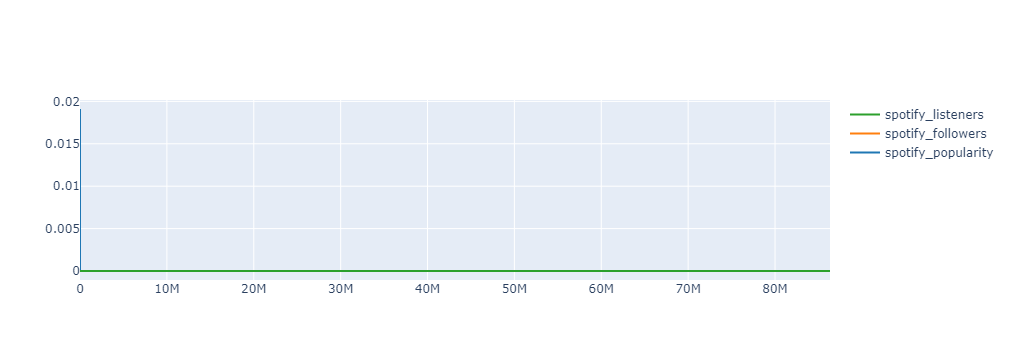

In [136]:
distri_data = [x for x in stats_array.T]
distri_label = [label for label in artists_matched_stats_df.columns]

fig = ff.create_distplot(
    distri_data,
    distri_label,
    curve_type='normal',  # override default 'kde'
    show_hist=False,
    show_rug=False,
)
fig.show()

In [7]:
genres_df

,spotify_genre,top_genre
0,21st century classical,art music
1,5th wave emo,experimental music
2,5th wave emo,world music
3,5th wave emo,hip hop music
4,5th wave emo,electronic music
...,...,...
6049,zouk riddim,electronic music
6050,zouk riddim,dance music
6051,zouk riddim,instrumental music
6052,zurich indie,world music


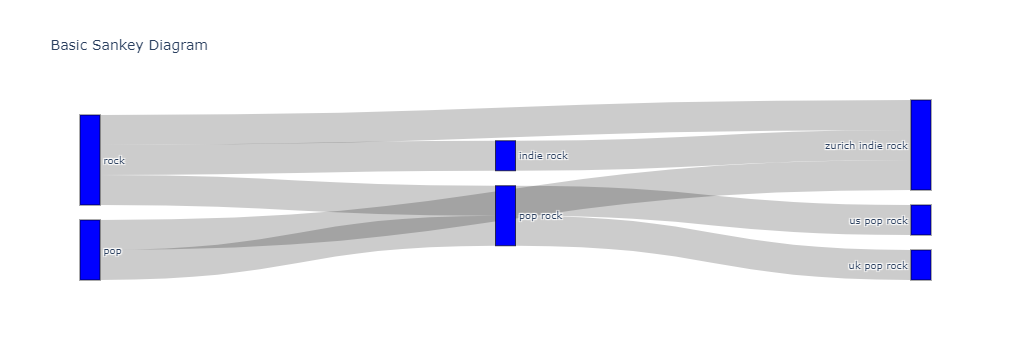

In [182]:
import plotly.graph_objects as go

label = [
    'rock',
    'pop',
    'indie rock',
    'pop rock',
    'zurich indie rock',
    'us pop rock',
    'uk pop rock',
]

source = [0, 0, 1, 2, 3, 3, 1, 0]
target = [2, 3, 3, 4, 5, 6, 4, 4]

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = label,
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = [1, 1, 1, 1, 1, 1, 1, 1],
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

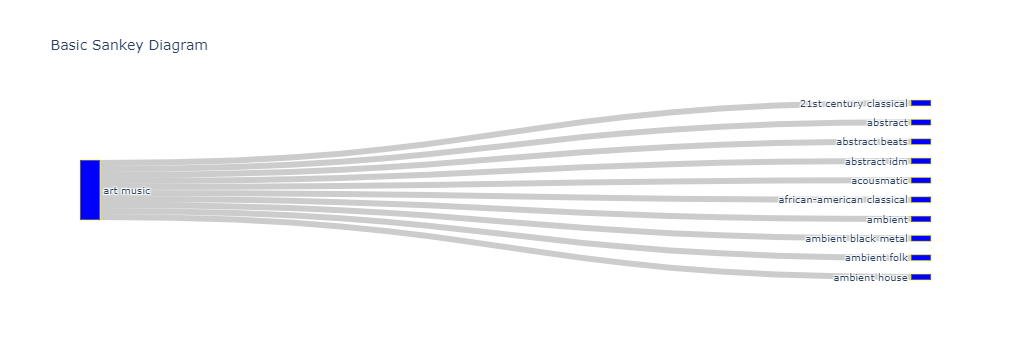

In [194]:
genres_dict = dict()
source = list()
target = list()
label = list()

top_genres = genres_df['top_genre'].unique()
for parent_genre in top_genres[:1]:
    parent_genre_df = genres_df.loc[genres_df['top_genre'] == parent_genre]
    sub_genres = parent_genre_df['spotify_genre'].unique()[:10]
    genres_dict[parent_genre] = list(sub_genres)
    for sub_genre in sub_genres:
        genres_dict[sub_genre] = list()

label = list(genres_dict.keys())
value = [1 for x in range(len(label))]

for parent_genre, sub_genres in genres_dict.items():
    parent_index = label.index(parent_genre)
    for sub_genre in sub_genres:
        sub_index = label.index(sub_genre)
        source.append(parent_index)
        target.append(sub_index)
        
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "yellow", width = 0.5),
      label = label,
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value,
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

---
---

In [80]:
artists_multiple_matches_df = artists_df.loc[idx_list].sort_values(by=['spotify_name'])
artists_multiple_matches_df.to_csv('data/spotify/data_spotify_artists_multiple_matches.csv', encoding='utf-8')
artists_multiple_matches_df

,artist_name,spotify_name,spotify_id,spotify_popularity,spotify_followers,spotify_listeners
artist_id,,,,,,
/artists/10119580-22deg-halo,22° Halo,22º Halo,6p355yiyJc67iSNeWLM8WH,11.0,1067.0,1500.0
/artists/9804639-22-halo,22 Halo,22º Halo,6p355yiyJc67iSNeWLM8WH,11.0,1067.0,1500.0
/artists/7309389-a-crashed-blackbird-rosehip,A Crashed Blackbird Rosehip,A Crashed Blackbird Called Rosehip,1NKizqgwDCXtUbMHeqA2Tv,6.0,88.0,635.0
/artists/6506249-a-crashed-blackbird-called-rosehip,A Crashed Blackbird Called Rosehip,A Crashed Blackbird Called Rosehip,1NKizqgwDCXtUbMHeqA2Tv,6.0,88.0,635.0
/artists/5990259-aspell,A-Spell,A.Spell,4zkmCFtAa1ETWHoZ2sNGvO,0.0,25.0,9.0
...,...,...,...,...,...,...
/artists/531180-za,Za!,Zaz,1mbgj8ERPs8lWi7t5cYrdy,65.0,1195585.0,2100000.0
/artists/25827-zippo,Zippo,Zippo,7Int2nVSzSBL8UDty3jGAR,23.0,1363.0,1300.0
/artists/7284179-zippo-italy,Zippo,Zippo,7Int2nVSzSBL8UDty3jGAR,23.0,1363.0,1300.0
